In [1]:
import datajoint as dj
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.conn().connect()

Please enter DataJoint username: root
Please enter DataJoint password: ········
Connecting root@localhost:3306


In [1]:
%matplotlib inline
import os
os.chdir('..')

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking
from pipeline.plot import behavior_plot

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
experiment.Session & ephys.Unit

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
432572,14,2018-11-25,daveliu,RRig
432572,15,2018-11-26,daveliu,RRig
435884,1,2018-12-07,daveliu,RRig


In [10]:
session_key = (experiment.Session & {'subject_id': 432572, 'session': 15}).fetch1('KEY')

In [11]:
session_key

{'subject_id': 432572, 'session': 15}

# Plot proportional 'correct' for one session

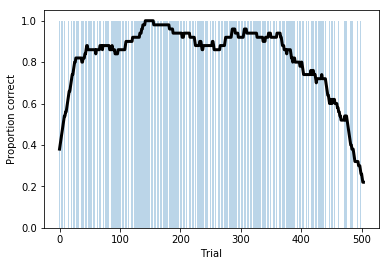

In [7]:
behavior_plot.plot_correct_proportion(session_key);

# Plot proportional 'correct' for multiple sessions

Still make use of the built-in `behavior_plot.plot_correct_proportion()` function. Iterate through all sessions of interest, extract proportional correct output and plot

In [7]:
session_keys = (experiment.Session & {'subject_id': 432572}).fetch('KEY', order_by='session')

In [63]:
p_correct = [behavior_plot.plot_correct_proportion(s, plot=False)[1] for s in session_keys]

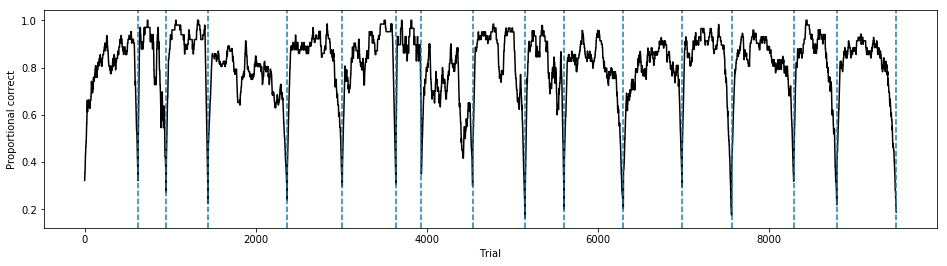

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.plot(np.hstack(p_correct), 'k') 
ax.set_ylabel('Proportional correct')
ax.set_xlabel('Trial')
for s in np.cumsum([len(d) for d in p_correct]):
    ax.axvline(x=s, linestyle='--')

# Plot proportional 'correct' for one session, modulated by photostim

In [8]:
photostims = experiment.Photostim * experiment.BrainLocation 

In [9]:
left_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="left"' & session_key).fetch1('KEY')
right_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="right"' & session_key).fetch1('KEY')
bi_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="both"' & session_key).fetch1('KEY')

(None, (0.8109452736318408, 0.8711656441717791), (0.7727272727272727, 0.875))

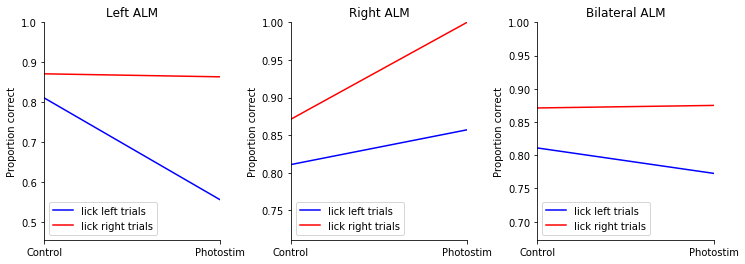

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)
behavior_plot.plot_photostim_effect(session_key, left_alm_photostim, axs=axs[0], title='Left ALM')
behavior_plot.plot_photostim_effect(session_key, right_alm_photostim, axs=axs[1], title='Right ALM')
behavior_plot.plot_photostim_effect(session_key, bi_alm_photostim, axs=axs[2], title='Bilateral ALM')

# Plot proportional 'correct' for multiple sessions, modulated by photostim


Still make use of the built-in `behavior_plot.plot_photostim_effect()` function. Iterate through all sessions of interest, extract proportional correct output and plot

`behavior_plot.plot_photostim_effect()` returns `fig, (cp_ctrl_left, cp_ctrl_right), (cp_stim_left, cp_stim_right)`

In [9]:
# Obtain sessions with photostim - order by session
session_keys = (experiment.Session & {'subject_id': 432572} & experiment.Photostim).fetch('KEY', order_by='session')

In [81]:
photostims = experiment.Photostim * experiment.BrainLocation
left_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="left"' & session_keys).fetch('KEY', order_by='session')
right_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="right"' & session_keys).fetch('KEY', order_by='session')
bi_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="both"' & session_keys).fetch('KEY', order_by='session')

In [82]:
# left ALM photostim
leftALM_pcorrect = []
for sess, pstim in zip(session_keys, left_alm_photostim):
    _, (cp_ctrl_left, cp_ctrl_right), (cp_stim_left, cp_stim_right) = behavior_plot.plot_photostim_effect(
        sess, pstim, plot=False)
    leftALM_pcorrect.append([cp_ctrl_left, cp_ctrl_right, cp_stim_left, cp_stim_right])
    
leftALM_pcorrect = np.vstack(leftALM_pcorrect).T

Text(0.5,0,'Session')

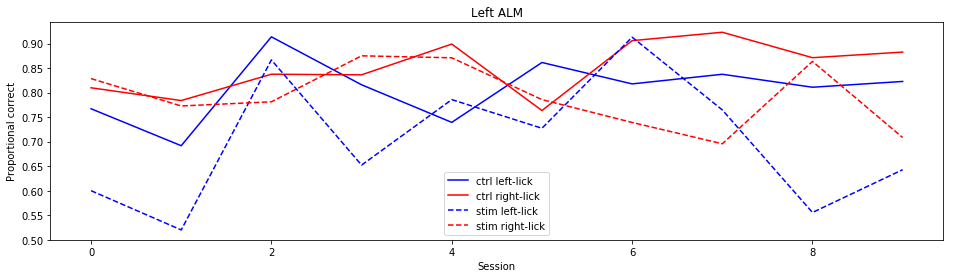

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
for d, color, style, label in zip(leftALM_pcorrect,
                                  ('b', 'r', 'b', 'r'),
                                  ('-', '-','--', '--'),
                                  ('ctrl left-lick', 'ctrl right-lick', 'stim left-lick', 'stim right-lick')):
    ax.plot(d, color=color, linestyle=style, label=label)
ax.legend()
ax.set_title('Left ALM')
ax.set_ylabel('Proportional correct')
ax.set_xlabel('Session')

In [84]:
# Right ALM photostim
rightALM_pcorrect = []
for sess, pstim in zip(session_keys, right_alm_photostim):
    _, (cp_ctrl_left, cp_ctrl_right), (cp_stim_left, cp_stim_right) = behavior_plot.plot_photostim_effect(
        sess, pstim, plot=False)
    rightALM_pcorrect.append([cp_ctrl_left, cp_ctrl_right, cp_stim_left, cp_stim_right])
    
rightALM_pcorrect = np.vstack(rightALM_pcorrect).T

Text(0.5,0,'Session')

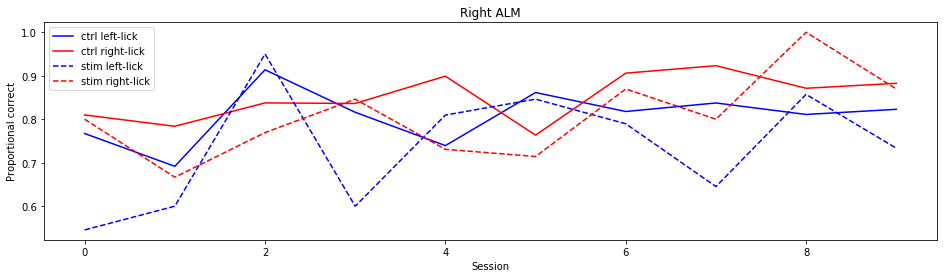

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
for d, color, style, label in zip(rightALM_pcorrect,
                                  ('b', 'r', 'b', 'r'),
                                  ('-', '-','--', '--'),
                                  ('ctrl left-lick', 'ctrl right-lick', 'stim left-lick', 'stim right-lick')):
    ax.plot(d, color=color, linestyle=style, label=label)
ax.legend()
ax.set_title('Right ALM')
ax.set_ylabel('Proportional correct')
ax.set_xlabel('Session')

In [86]:
# Bilateral ALM photostim
bilateralALM_pcorrect = []
for sess, pstim in zip(session_keys, bi_alm_photostim):
    _, (cp_ctrl_left, cp_ctrl_right), (cp_stim_left, cp_stim_right) = behavior_plot.plot_photostim_effect(
        sess, pstim, plot=False)
    bilateralALM_pcorrect.append([cp_ctrl_left, cp_ctrl_right, cp_stim_left, cp_stim_right])
    
bilateralALM_pcorrect = np.vstack(bilateralALM_pcorrect).T

Text(0.5,0,'Session')

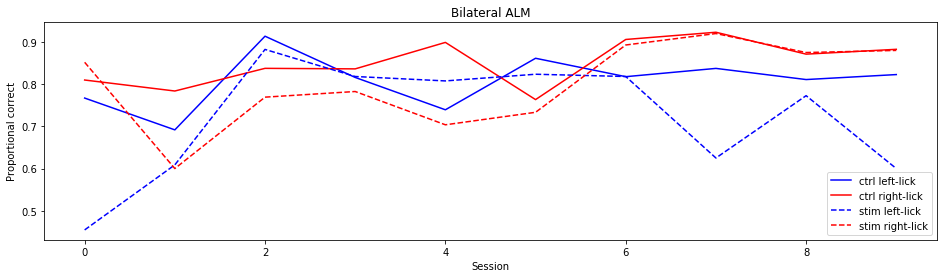

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
for d, color, style, label in zip(bilateralALM_pcorrect,
                                  ('b', 'r', 'b', 'r'),
                                  ('-', '-','--', '--'),
                                  ('ctrl left-lick', 'ctrl right-lick', 'stim left-lick', 'stim right-lick')):
    ax.plot(d, color=color, linestyle=style, label=label)
ax.legend()
ax.set_title('Bilateral ALM')
ax.set_ylabel('Proportional correct')
ax.set_xlabel('Session')

# Plot movement tracking with spiking overlay

In [12]:
ephys.Unit & session_key & 'unit_quality != "all"'

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,electrode_group electrode group,electrode electrode,"unit_posx (um) estimated x position of the unit relative to probe's (0,0)","unit_posy (um) estimated y position of the unit relative to probe's (0,0)",spike_times (s) from the start of the first data point used in clustering,unit_amp,unit_snr,waveform average spike waveform
432572,15,1,jrclust,2,2,good,15131808323,npx_first384,0,1,16.495502471923828,2.9200849533081055,=BLOB=,348.4814,19.617632,=BLOB=
432572,15,1,jrclust,3,3,good,15131808323,npx_first384,0,4,33.45402526855469,14.26748275756836,=BLOB=,224.59451,14.602229,=BLOB=
432572,15,1,jrclust,15,15,good,15131808323,npx_first384,0,10,44.84944152832031,80.28626251220703,=BLOB=,218.74455,14.271657,=BLOB=
432572,15,1,jrclust,16,16,good,15131808323,npx_first384,0,10,42.82568359375,80.13217163085938,=BLOB=,141.39143,9.339225,=BLOB=
432572,15,1,jrclust,19,19,good,15131808323,npx_first384,0,11,1.8509048223495483,102.2591552734375,=BLOB=,247.92897,16.251682,=BLOB=
432572,15,1,jrclust,25,25,good,15131808323,npx_first384,0,14,44.66130828857422,123.09004211425781,=BLOB=,129.26016,8.2028055,=BLOB=
432572,15,1,jrclust,27,27,good,15131808323,npx_first384,0,15,6.340969085693359,136.26344299316406,=BLOB=,161.1375,10.288025,=BLOB=


In [16]:
unit_key = (ephys.Unit & session_key & 'unit_quality = "good"' & 'insertion_number=2' & 'unit=34').fetch1('KEY')

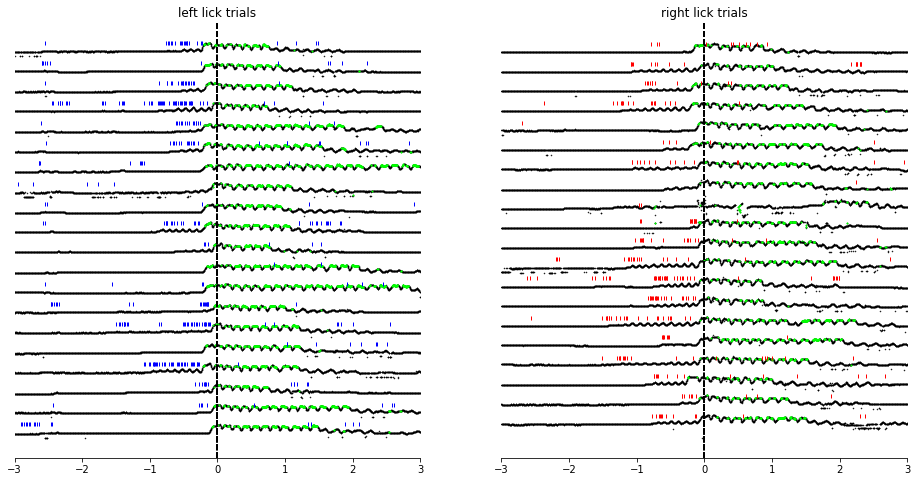

In [19]:
behavior_plot.plot_tracking(session_key, unit_key, xlim=(-3, 3), trial_offset=10, trial_limit=20);

In [20]:
unit_key = (ephys.Unit & session_key & 'unit_quality != "all"' & 'insertion_number=2' & 'unit=1').fetch1('KEY')

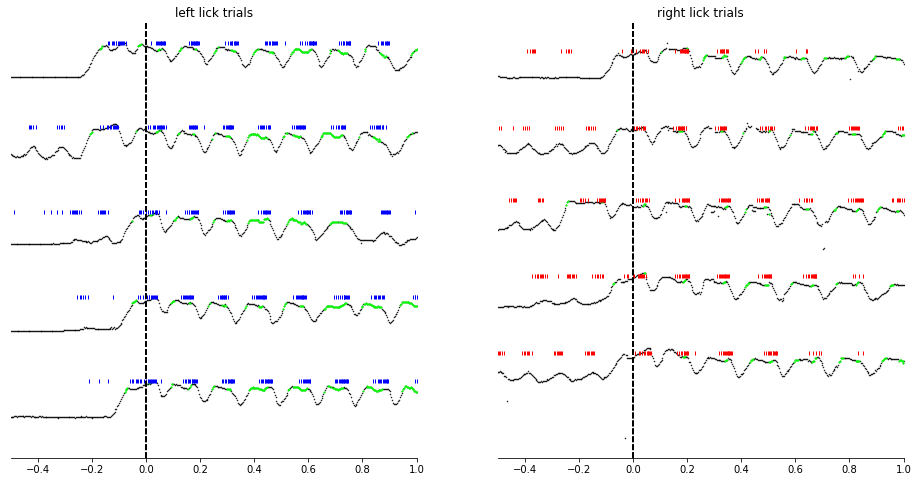

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
behavior_plot.plot_tracking(session_key, unit_key, xlim=(-0.5, 1), trial_offset=10, trial_limit=5, axs=axs)

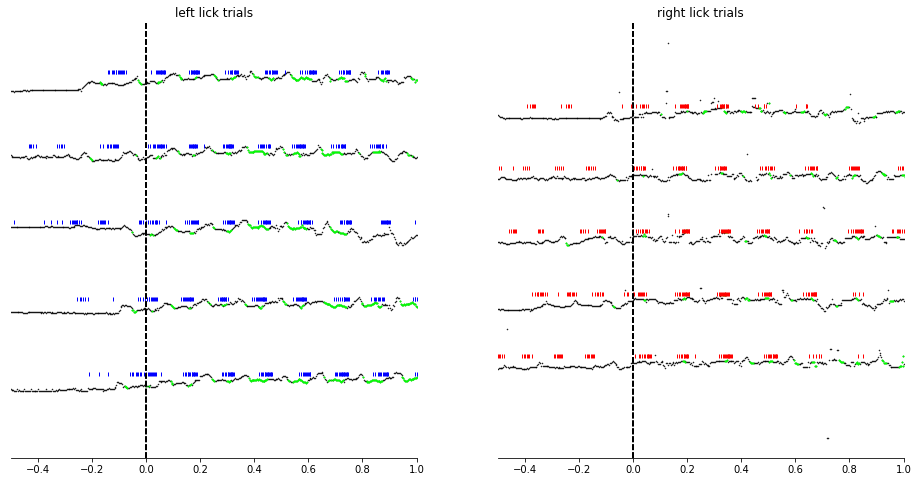

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
behavior_plot.plot_tracking(session_key, unit_key, tracking_feature='jaw_x', xlim=(-0.5, 1), trial_offset=10, trial_limit=5, axs=axs)

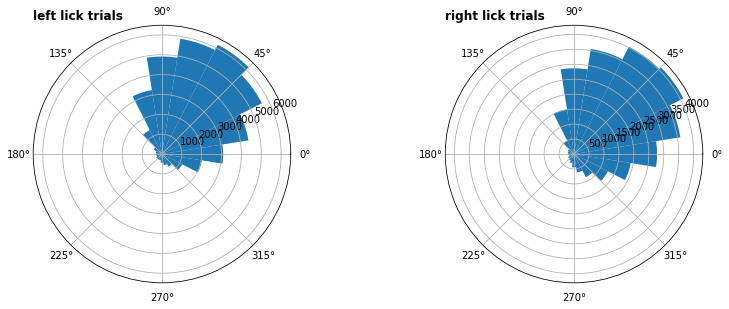

In [17]:
behavior_plot.plot_unit_jaw_phase_dist(session_key, unit_key);

# Plot single-trial jaw movement

In [27]:
trials = tracking.Tracking * experiment.BehaviorTrial & session_key & experiment.TrialEvent

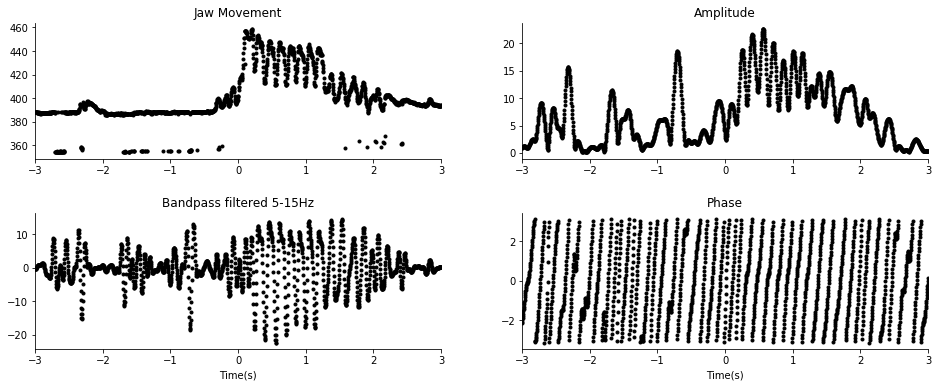

In [28]:
behavior_plot.plot_trial_jaw_movement((trials & f'trial = 100').fetch1('KEY'));

# Plot sliding-window phase distribution of jaw movement

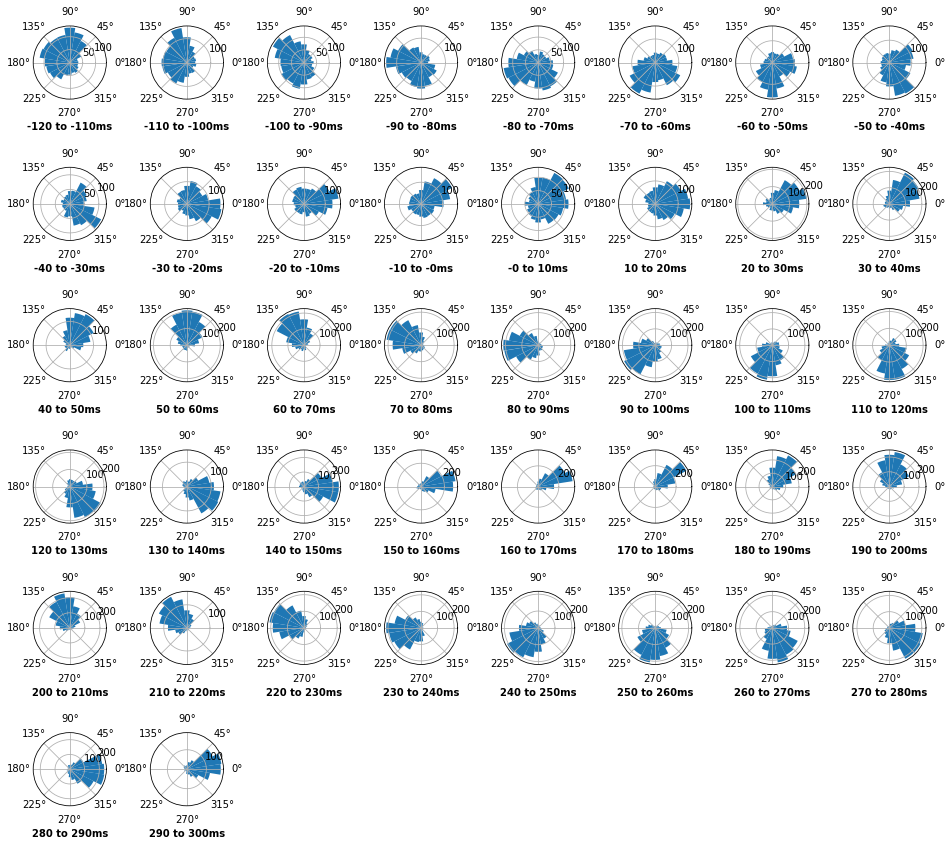

In [28]:
behavior_plot.plot_windowed_jaw_phase_dist(session_key, xlim=(-0.12, 0.3), w_size=0.01, bin_counts=20)

# Plot all phase distribution of jaw movement

In [ ]:
behavior_plot.plot_jaw_phase_dist(session_key, xlim=(-0.12, 0.3), bin_counts=20)

# =============================================

In [34]:
import importlib
importlib.reload(behavior_plot)

<module 'pipeline.plot.behavior_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\behavior_plot.py'>